In [22]:
# Import packages.
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Read the data.
df = pd.read_table('./data/seeds_dataset.txt',sep="\t",header=None,
                   names=["area","perimeter","compactness","length","width","coef","groove","label"])

### Attribute Information:

To construct the data, seven geometric parameters of wheat kernels were measured:
1. area A,
2. perimeter P,
3. compactness C = 4*pi*A/P^2,
4. length of kernel,
5. width of kernel,
6. asymmetry coefficient
7. length of kernel groove.
All of these parameters were real-valued continuous.

In [3]:
df.head()

,area,perimeter,compactness,length,width,coef,groove,label
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


1) How to compare multiple labels with respect to one single feature? Each label is attached to a 1-dim dataset of feature measurements. Datasets: Seed.

2) How to see intrinsic differences among multiple labels with respect to multiple features? Each label is attached to a K-dim dataset of feature measurements. Datasets: Seed.

3) How to deal with categorical features? Dataset: Automobile.

4) How to measure associative relations between a categorical response variable and multiple covariate features. Datasets: Seedand Automobile datasets.

In [4]:
np.shape(df)

(210, 8)

#### Visualize the dataset by using PCA

In [26]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

# standardize features
x = StandardScaler().fit_transform(x)

In [31]:
pca = PCA(n_components=2)
pca_fit = pca.fit_transform(x)
pca_fit_df = pd.DataFrame(pca_fit, columns = ['pc1', 'pc2'])
pca_df = pd.concat([pca_fit_df, df[['label']]], axis = 1)

Text(0.5, 1.0, 'Principle Component')

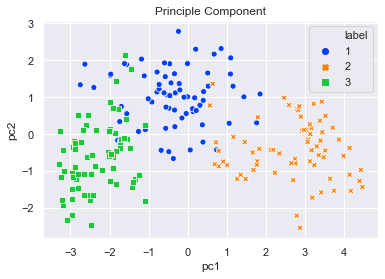

In [38]:
sns.scatterplot(x = 'pc1', y = 'pc2', 
                hue = 'label', style = 'label', 
                palette = 'bright', data = pca_df)
plt.title('Principle Components of Seeds Dataset')